# CRSP: event tables

&copy; **Johannes Ruf** (comments welcome under j.ruf@lse.ac.uk, February 2023)

In [1]:
import pandas as pd

import seaborn
seaborn.set()

import wrds
WRDS_LOGIN = 'xxx'    # update to your login info on CRSP

pd.set_option('display.max_columns', None)

In [2]:
db = wrds.Connection(wrds_username=WRDS_LOGIN)

Loading library list...
Done


In this notebook, we continue exploring the CRSP dataset, in particular its event tables.

So far, we have seen the time series tables: `StkDlySecurityData`, `StkDlySecurityPrimaryData`, and `dsf_v2` (all providing the time series of stock prices with one row per trading day for each company). We also have seen the table `stocknames_v2`,  a so called event table, constructed by WRDS. Event tables have one row per event - they only list changes in the underlying data.

WRDS created some tables that put all those events together, e.g., `dse` or `dseall`.  However, they are in the legacy format and as of now (February 2023), no updated versions are provided. We thus consider here the original CRSP files.

There are 4 types of events in CRSP:

 * Security information events / name information (NAMES).
 * Delisting event histories (DELIST).
 * Distribution events (DIST).
 * Shares event histories (SHARES).
 
(In parentheses are the event descriptors in the legacy table `dse`.)  
 
In the legacy data there was another type of event concerning changes of status of NASDAQ-traded stocks. In the new data format, the corresponding table doesn't exist anymore. Instead, the information is now contained in the other tables.  See the next notebook for a discussion of information available specifically for NASDAQ-traded stocks.

## Event type 1: Security information / names

Let's first look at the security information events, accessed via the table `StkSecurityInfoHist`:

In [3]:
googleC_permno = 14542

In [4]:
query = f"SELECT * FROM crsp.StkSecurityInfoHist WHERE permno = {googleC_permno}"
db.raw_sql(query)

,permno,secinfostartdt,secinfoenddt,securitybegdt,securityenddt,securityhdrflg,hdrcusip,hdrcusip9,cusip,cusip9,primaryexch,conditionaltype,exchangetier,tradingstatusflg,securitynm,shareclass,usincflg,issuertype,securitytype,securitysubtype,sharetype,securityactiveflg,delactiontype,delstatustype,delreasontype,delpaymenttype,ticker,tradingsymbol,permco,siccd,naics,icbindustry,uesindustry,nasdcompno,nasdissuno,issuernm
0,14542,2014-04-03,2015-04-23,2014-04-03,2023-12-29,N,02079K10,02079K107,38259P70,38259P706,Q,RW,S,A,GOOGLE INC; COM C; CONS,C,Y,CORP,EQTY,COM,NS,Y,N/A,UNAV,NACT,UNAV,GOOG,GOOG,45483,7375,519130,TECH,NOAVAIL,60056743,74070,GOOGLE INC
1,14542,2015-04-24,2015-10-04,2014-04-03,2023-12-29,N,02079K10,02079K107,38259P70,38259P706,Q,RW,S,A,GOOGLE INC; COM C; CONS,C,Y,CORP,EQTY,COM,NS,Y,N/A,UNAV,NACT,UNAV,GOOG,GOOG,45483,7375,519190,TECH,NOAVAIL,60056743,74070,GOOGLE INC
2,14542,2015-10-05,2018-02-01,2014-04-03,2023-12-29,N,02079K10,02079K107,02079K10,02079K107,Q,RW,S,A,ALPHABET INC; COM C; CONS,C,Y,CORP,EQTY,COM,NS,Y,N/A,UNAV,NACT,UNAV,GOOG,GOOG,45483,7375,519190,TECH,NOAVAIL,60056743,74070,ALPHABET INC
3,14542,2018-02-02,2023-09-28,2014-04-03,2023-12-29,N,02079K10,02079K107,02079K10,02079K107,Q,RW,S,A,ALPHABET INC; COM C; CONS,C,Y,CORP,EQTY,COM,NS,Y,N/A,UNAV,NACT,UNAV,GOOG,GOOG,45483,7375,334419,TECH,NOAVAIL,60056743,74070,ALPHABET INC
4,14542,2023-09-29,2023-09-30,2014-04-03,2023-12-29,N,02079K10,02079K107,02079K10,02079K107,Q,RW,S,A,ALPHABET INC; COM C; CONS,C,Y,CORP,EQTY,COM,NS,Y,N/A,UNAV,NACT,UNAV,GOOG,GOOG,45483,7375,334419,TECH,MEDCOMM,60056743,74070,ALPHABET INC
5,14542,2023-10-01,2023-10-12,2014-04-03,2023-12-29,N,02079K10,02079K107,02079K10,02079K107,Q,RW,S,A,ALPHABET INC; COM C; CONS,C,Y,CORP,EQTY,COM,NS,Y,N/A,UNAV,NACT,UNAV,GOOG,GOOG,45483,7375,334419,NOAVAIL,MEDCOMM,60056743,74070,ALPHABET INC
6,14542,2023-10-13,2023-12-29,2014-04-03,2023-12-29,Y,02079K10,02079K107,02079K10,02079K107,Q,RW,S,A,ALPHABET INC; COM C; CONS,C,Y,CORP,EQTY,COM,NS,Y,N/A,UNAV,NACT,UNAV,GOOG,GOOG,45483,7375,541511,NOAVAIL,MEDCOMM,60056743,74070,ALPHABET INC


These events concern changes in the company's name, ticker, cusip, etc.  If we are only interested in the most up-to-date information, we could also use the table `StkSecurityInfoHdr` as follows:

In [5]:
query = f"SELECT * FROM crsp.StkSecurityInfoHdr WHERE permno = {googleC_permno}"
db.raw_sql(query)

,permno,secinfostartdt,secinfoenddt,securitybegdt,securityenddt,securityhdrflg,hdrcusip,hdrcusip9,cusip,cusip9,primaryexch,conditionaltype,exchangetier,tradingstatusflg,securitynm,shareclass,usincflg,issuertype,securitytype,securitysubtype,sharetype,securityactiveflg,delactiontype,delstatustype,delreasontype,delpaymenttype,ticker,tradingsymbol,permco,siccd,naics,icbindustry,uesindustry,nasdcompno,nasdissuno,issuernm
0,14542,2023-10-13,2023-12-29,2014-04-03,2023-12-29,Y,02079K10,02079K107,02079K10,02079K107,Q,RW,S,A,ALPHABET INC; COM C; CONS,C,Y,CORP,EQTY,COM,NS,Y,N/A,UNAV,NACT,UNAV,GOOG,GOOG,45483,7375,541511,NOAVAIL,MEDCOMM,60056743,74070,ALPHABET INC


There are two related tables provided by CRSP, with name events, but not on securities level (i.e., by `permno`), but on issuer level (i.e., by `permco`): `StkIssuerInfoHist` and `StkSecurityInfoHdr`.

In [6]:
google_permco = 45483

In [7]:
query = f"SELECT * FROM crsp.StkIssuerInfoHist WHERE permco = {google_permco}"
db.raw_sql(query)

,permco,issinfostartdt,issinfoenddt,issuerbegdt,issuerenddt,issuerhdrflg,cnum,issuernm,securityrangecnt,securitytotalcnt,usincflg,issuertype,issuerstatustype,siccd,naics,icbindustry,uesindustry,nasdcompno
0,45483,2004-08-19,2005-08-18,2004-08-19,2023-12-29,N,38259P,GOOGLE INC,1,2,Y,CORP,AC,7375,514191,NOAVAIL,NOAVAIL,60056743
1,45483,2005-08-19,2006-07-20,2004-08-19,2023-12-29,N,38259P,GOOGLE INC,1,2,Y,CORP,AC,7375,518111,NOAVAIL,NOAVAIL,60056743
2,45483,2006-07-21,2008-01-31,2004-08-19,2023-12-29,N,38259P,GOOGLE INC,1,2,Y,CORP,AC,7375,518112,NOAVAIL,NOAVAIL,60056743
3,45483,2008-02-01,2008-06-26,2004-08-19,2023-12-29,N,38259P,GOOGLE INC,1,2,Y,CORP,AC,7375,519130,NOAVAIL,NOAVAIL,60056743
4,45483,2008-06-27,2014-04-02,2004-08-19,2023-12-29,N,38259P,GOOGLE INC,1,2,Y,CORP,AC,7375,519130,TECH,NOAVAIL,60056743
5,45483,2014-04-03,2015-04-23,2004-08-19,2023-12-29,N,38259P,GOOGLE INC,2,2,Y,CORP,AC,7375,519130,TECH,NOAVAIL,60056743
6,45483,2015-04-24,2015-10-04,2004-08-19,2023-12-29,N,38259P,GOOGLE INC,2,2,Y,CORP,AC,7375,519190,TECH,NOAVAIL,60056743
7,45483,2015-10-05,2018-02-01,2004-08-19,2023-12-29,N,02079K,ALPHABET INC,2,2,Y,CORP,AC,7375,519190,TECH,NOAVAIL,60056743
8,45483,2018-02-02,2023-09-28,2004-08-19,2023-12-29,N,02079K,ALPHABET INC,2,2,Y,CORP,AC,7375,334419,TECH,NOAVAIL,60056743
9,45483,2023-09-29,2023-09-30,2004-08-19,2023-12-29,N,02079K,ALPHABET INC,2,2,Y,CORP,AC,7375,334419,TECH,MEDCOMM,60056743


Let's only look at the two columns `securityrangecnt`, describing how many `permno`s the issuer has in the specific date range, and at `securitytotalcnt`, describing how many `permno`s the issuer had accross its active time (hence the value in this column doesn't change.)

As a final remark concerning name events, we have already encountered the table `stocknames_v2` (constructed by WRDS), which is a compact table concerning with the most important name events:

In [8]:
query = f"SELECT * FROM crsp.stocknames_v2 WHERE permno = {googleC_permno}"
db.raw_sql(query)

,permno,permco,namedt,nameenddt,securitybegdt,securityenddt,hdrcusip,hdrcusip9,cusip,cusip9,ticker,issuernm,primaryexch,conditionaltype,tradingstatusflg,shareclass,sharetype,securitytype,securitysubtype,usincflg,issuertype,siccd
0,14542,45483,2014-04-03,2015-10-04,2014-04-03,2023-12-29,02079K10,02079K107,38259P70,38259P706,GOOG,GOOGLE INC,Q,RW,A,C,NS,EQTY,COM,Y,CORP,7375
1,14542,45483,2015-10-05,2023-12-29,2014-04-03,2023-12-29,02079K10,02079K107,02079K10,02079K107,GOOG,ALPHABET INC,Q,RW,A,C,NS,EQTY,COM,Y,CORP,7375


It contains the change of company name from Google to Alphabet on Oct 5, 2015, but not the changes in the *NAICS* code (North American Industry Classification System) on April 24, 2014 and Feb 2, 2018.

## Event type 2: Delistings

When backtesting trading strategies it is quite important to know how well a portfolio does with regard to these stocks that stop trading (for various reasons). In CRSP, such events are called *delistings* -- they occur on the last day of a security when it stops being actively traded. These events are collected in the CRSP table `StkDelists`.

One strength of CRSP is the good quality of *delisting returns*: 
''Delisting Return is the return of security after it is
delisted. It is calculated by comparing a value after
delisting against the price on the security’s last trading
date. The value after delisting can include a price on
another exchange or the total value of distributions to
shareholders. If there is no opportunity to trade a stock
after delisting before it is declared worthless, the value
after delisting is zero. Delisting Returns are calculated
similarly to total returns except that the value after
delisting is used as the current price.
Valid delisting payment information is either a
valid price with at least a bid and ask quote within
ten trading periods, or a complete set of payments
received for the shares. If information after delisting
is insufficient to generate a return a missing value is reported.'' 

In [9]:
query = f"SELECT * FROM crsp.StkDelists WHERE permno = {googleC_permno}"
db.raw_sql(query)

,permno,delistingdt,deldtprc,deldtprcflg,delactiontype,delstatustype,delreasontype,delpaymenttype,delpermno,delpermco,delret,delretmisstype,delnextdt,delnextprc,delnextprcflg,delamtdt,deldivamt,deldistype,deldlydt


We see there is no entry for Google/Alphabet. Indeed, it didn't go bankrupt or stop being actively traded for some reason (e.g. a merger). Hence there is no entry (this is different from the legacy data, where each stock had an entry at the end of its reported time series).

Let's look at the whole table:

In [10]:
delists =  db.raw_sql("SELECT * FROM crsp.StkDelists")

In [11]:
total_number_permnos = len(db.raw_sql("SELECT DISTINCT permno FROM crsp.dsf_v2"))
print('There are {} securities in CRSP'.format(total_number_permnos))
print('There are {} securities that got delisted.'.format(len(delists)))

# alternative to the first row, use SQL: 
# total_number_permnos = db.raw_sql("SELECT COUNT (DISTINCT permno) FROM crsp.dsf_v2").values[0, 0]

There are 37776 securities in CRSP
There are 28371 securities that got delisted.


There are many assets in CRSP that are not common stocks, e.g. ADRs (American Depository Receipts).  Hence the numbers above should not be interpreted as numbers of traded US companies. (We will discuss this in more detail in the next notebook.)

In [12]:
delists.head()

,permno,delistingdt,deldtprc,deldtprcflg,delactiontype,delstatustype,delreasontype,delpaymenttype,delpermno,delpermco,delret,delretmisstype,delnextdt,delnextprc,delnextprcflg,delamtdt,deldivamt,deldistype,deldlydt
0,10000,1987-06-11,0.2188,BA,GDR,VCL,INSC,PRCF,0,0,0.000000,NA,1987-06-12,0.2188,DP,1987-06-12,0.0000,NO,1987-06-12
1,10001,2017-08-03,13.1000,TR,MER,FPAY,UNAV,CASH,0,0,0.000000,NA,None,NaN,DA,2017-08-04,13.1000,D1,2017-08-04
2,10002,2013-02-15,2.9800,TR,MER,FPAY,UNAV,STK,35263,1658,0.010906,NA,None,NaN,DA,2013-02-19,3.0125,D1,2013-02-19
3,10003,1995-12-15,5.4688,TR,MER,FPAY,UNAV,STK,10569,8477,-0.003648,NA,None,NaN,DA,1995-12-18,5.4488,D1,1995-12-18
4,10004,1986-01-17,6.8750,BA,GDR,VCL,OFFRE,PRCF,0,0,NaN,DM,None,NaN,DM,None,NaN,NO,1986-01-20


For each security, there is an entry if the security stopped being actively traded. The corresponding row in the table describes the reason for and the circumstances of the delisting. 

Let's look at the colum `delactiontype`:

In [13]:
delists['delactiontype'].value_counts(normalize=True)

delactiontype
MER    0.501956
GDR    0.373057
GLI    0.087448
GEX    0.037433
LOS    0.000106
Name: proportion, dtype: float64

The most frequent entry is `MER`, standing for a merger with another company (and hence disappearing from the investment universe). The second most frequent entry is `GDR`, representing a stock being dropped (e.g., because of bankruptcy or a move to a different exchange that's not included in CRSP).

When backtesting trading strategies, delistings will be very important. Indeed, to understand a strategy's performance it might be essential to understand its performance on days when stocks fall out of the investment universe.

Let's look at the returns of one of these delisted companies, e.g., the following one:

In [14]:
permno = 10002

In [15]:
query = f"SELECT issuernm FROM crsp.StkSecurityInfoHdr WHERE permno = {permno}"
db.raw_sql(query).iloc[0, 0]

'BANCTRUST FINANCIAL GROUP INC'

Let's see how these delistings appear in the pricing table. For simplicity, let's look at `dsf_v2`:

In [16]:
query = f"SELECT * FROM crsp.dsf_v2 WHERE permno = {permno}"
prices = db.raw_sql(query, date_cols='dlycaldt')

In [17]:
prices.tail()

,permno,hdrcusip,permco,siccd,nasdissuno,yyyymmdd,dlycaldt,dlydelflg,dlyprc,dlyprcflg,dlycap,dlycapflg,dlyprevprc,dlyprevprcflg,dlyprevdt,dlyprevcap,dlyprevcapflg,dlyret,dlyretx,dlyreti,dlyretmissflg,dlyretdurflg,dlyorddivamt,dlynonorddivamt,dlyfacprc,dlydistretflg,dlyvol,dlyclose,dlylow,dlyhigh,dlybid,dlyask,dlyopen,dlynumtrd,dlymmcnt,dlyprcvol,disfacpr,disfacshr,disexdt,shrout
6830,10002,05978R10,7954,6020,10399,20130212,2013-02-12,N,2.96,TR,53179.36,BP,2.94,BA,2013-02-11,52820.04,PB,0.006803,0.006803,0.0,NA,D1,0.0,0.0000,1.0,NO,4921.0,2.96,2.91,2.9601,2.94,2.98,2.95,23.0,30.0,14566.2,NaN,NaN,None,17966.0
6831,10002,05978R10,7954,6020,10399,20130213,2013-02-13,N,2.95,TR,52999.70,BP,2.96,TR,2013-02-12,53179.36,PB,-0.003378,-0.003378,0.0,NA,D1,0.0,0.0000,1.0,NO,502.0,2.95,2.95,2.9500,2.73,2.96,2.95,7.0,30.0,1480.9,NaN,NaN,None,17966.0
6832,10002,05978R10,7954,6020,10399,20130214,2013-02-14,N,2.92,TR,52460.72,BP,2.95,TR,2013-02-13,52999.70,PB,-0.010170,-0.010170,0.0,NA,D1,0.0,0.0000,1.0,NO,76208.0,2.92,2.92,2.9800,2.92,2.94,2.98,334.0,30.0,222527.4,NaN,NaN,None,17966.0
6833,10002,05978R10,7954,6020,10399,20130215,2013-02-15,N,2.98,TR,53538.68,BP,2.92,TR,2013-02-14,52460.72,PB,0.020548,0.020548,0.0,NA,D1,0.0,0.0000,1.0,NO,2319.0,2.98,2.95,2.9800,2.95,2.98,2.95,19.0,30.0,6910.6,-1.0,-1.0,2013-02-19,17966.0
6834,10002,05978R10,7954,6020,10399,20130219,2013-02-19,Y,0.00,DA,NaN,DE,2.98,TR,2013-02-15,53538.68,PB,0.010906,0.010906,0.0,NA,DD,0.0,3.0125,1.0,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In the last two rows we make several observations. First of all, in the second-to-last trading day a distribution event is noted (recall the Google case study from the previous notebook). Both columns `disfacpr` and `disfacshr` are set to -1, meaning that the price of number of outstanding shares both go to zero (-100%). 


In the last trading day, first of all, the delisting flag `dlydelflg` is set to `Y`(es). The daily price flag `dlyprcflg` is set to `DA` (meaning the return is computed via a 'delisting amount'). This is different from the values we already have seen, namely `TR`, `BA`, and `MP`.   The new price in `dylprc` is zero. The cap flag `dlycapflg` is set to `DE` for 'delisted'.  However, importantly the return `dlyret` is set to 1.0906%.  This is very helpful, as this is exactly the delisting return `delret` from the delisting table `StkDelists` (see above).  

In the legacy tables, the delisting returns were not part of the stock price files (e.g., `dsf`).  The inclusion of delisting returns is a major improvement as we now always reminded of the presence of delisting returns.  To check, let's just see the last rows in the legacy table and note that the delisting event doesn't appear there:

In [18]:
query = f"SELECT * FROM crsp.dsf WHERE permno = {permno}"
db.raw_sql(query).tail(3)

,cusip,permno,permco,issuno,hexcd,hsiccd,date,bidlo,askhi,prc,vol,ret,bid,ask,shrout,cfacpr,cfacshr,openprc,numtrd,retx
6831,05978R10,10002,7954,10399,3,6020,2013-02-13,2.95,2.95,2.95,502.0,-0.003378,2.73,2.96,17966.0,1.0,1.0,2.95,7.0,-0.003378
6832,05978R10,10002,7954,10399,3,6020,2013-02-14,2.92,2.98,2.92,76208.0,-0.010170,2.92,2.94,17966.0,1.0,1.0,2.98,334.0,-0.010170
6833,05978R10,10002,7954,10399,3,6020,2013-02-15,2.95,2.98,2.98,2319.0,0.020548,2.95,2.98,17966.0,1.0,1.0,2.95,19.0,0.020548


The lack of delisting return in the legacy tables could have led to a biased analysis if the researcher would have forgotten to include it.

### Issue: missing delisting returns

Unfortunately, CRSP still has some missing delisting returns. The `delretmisstype` flag describes the reason for missing values.

In [19]:
delists.head()

,permno,delistingdt,deldtprc,deldtprcflg,delactiontype,delstatustype,delreasontype,delpaymenttype,delpermno,delpermco,delret,delretmisstype,delnextdt,delnextprc,delnextprcflg,delamtdt,deldivamt,deldistype,deldlydt
0,10000,1987-06-11,0.2188,BA,GDR,VCL,INSC,PRCF,0,0,0.000000,NA,1987-06-12,0.2188,DP,1987-06-12,0.0000,NO,1987-06-12
1,10001,2017-08-03,13.1000,TR,MER,FPAY,UNAV,CASH,0,0,0.000000,NA,None,NaN,DA,2017-08-04,13.1000,D1,2017-08-04
2,10002,2013-02-15,2.9800,TR,MER,FPAY,UNAV,STK,35263,1658,0.010906,NA,None,NaN,DA,2013-02-19,3.0125,D1,2013-02-19
3,10003,1995-12-15,5.4688,TR,MER,FPAY,UNAV,STK,10569,8477,-0.003648,NA,None,NaN,DA,1995-12-18,5.4488,D1,1995-12-18
4,10004,1986-01-17,6.8750,BA,GDR,VCL,OFFRE,PRCF,0,0,NaN,DM,None,NaN,DM,None,NaN,NO,1986-01-20


In [20]:
delists['delretmisstype'].value_counts(normalize=True)

delretmisstype
NA    0.878326
DM    0.060449
DG    0.050545
MV    0.005534
DP    0.005146
Name: proportion, dtype: float64

The two values `NA` and `MV` have returns, so roughly 12% of entries don't have delisting returns.

Here is one example:

In [21]:
permno = 10004

In [22]:
query = f"SELECT issuernm FROM crsp.StkSecurityInfoHdr WHERE permno = {permno}"
db.raw_sql(query).iloc[0, 0]

'CLOSE OUTS PLUS INC'

In [23]:
query = f"SELECT * FROM crsp.dsf_v2 WHERE permno = {permno}"
db.raw_sql(query, date_cols='dlycaldt')

,permno,hdrcusip,permco,siccd,nasdissuno,yyyymmdd,dlycaldt,dlydelflg,dlyprc,dlyprcflg,dlycap,dlycapflg,dlyprevprc,dlyprevprcflg,dlyprevdt,dlyprevcap,dlyprevcapflg,dlyret,dlyretx,dlyreti,dlyretmissflg,dlyretdurflg,dlyorddivamt,dlynonorddivamt,dlyfacprc,dlydistretflg,dlyvol,dlyclose,dlylow,dlyhigh,dlybid,dlyask,dlyopen,dlynumtrd,dlymmcnt,dlyprcvol,disfacpr,disfacshr,disexdt,shrout
0,10004,18906310,7960,5330,10407,19860117,1986-01-17,N,6.875,BA,13750.0,BP,7.000,BA,1986-01-16,14000.0,PB,-0.017857,-0.017857,0.0,NA,D1,0.0,0.0,1.0,NO,900.0,None,None,None,6.75,7.00,None,None,7.0,6187.5,None,None,None,2000.0
1,10004,18906310,7960,5330,10407,19860120,1986-01-20,Y,NaN,DM,NaN,DE,6.875,BA,1986-01-17,13750.0,PB,NaN,NaN,NaN,DM,MR,0.0,0.0,1.0,NO,NaN,None,None,None,NaN,NaN,None,None,NaN,NaN,None,None,None,NaN
2,10004,18906310,7960,5330,10407,19860115,1986-01-15,N,7.250,BA,14500.0,BP,NaN,NS,None,NaN,MP,NaN,NaN,NaN,NS,MR,0.0,0.0,1.0,NO,4600.0,None,None,None,7.00,7.50,None,None,7.0,33350.0,None,None,None,2000.0
3,10004,18906310,7960,5330,10407,19860116,1986-01-16,N,7.000,BA,14000.0,BP,7.250,BA,1986-01-15,14500.0,PB,-0.034483,-0.034483,0.0,NA,D1,0.0,0.0,1.0,NO,16800.0,None,None,None,6.75,7.25,None,None,7.0,117600.0,None,None,None,2000.0


We see that on the last day (January 20) there is a row, with a missing return.

What to do if delisting returns are missing but required?  I have uploaded a couple of papers that discuss this issue. Here are some possibilities how to treat missing delisting returns:

* Assume delisting return is 0. -> bias;
* Assume delisting return is -100\%. -> bias;
* Assume delisting return is something in between, e.g., -30\%;
* Use average delisting return from the ones with the same reason for delisting, e.g., with the same value in `delactiontype` -> might change, for example, when adding new years; are stocks with missing delisting returns somehow different from stocks whose delisting returns are provided?

### Additional delisting issues

Unfortunately, there are yet at least three other sources of trouble:

* Monthly delisting returns are often *not* real delisting returns;
* temporary delistings;
* abnormal delisting returns.

#### Monthly delisting returns not always true delisting returns

Let's first discuss monthly delisting returns. As an example, we use the stock as above, with the missing delisting return:

In [24]:
query = f"SELECT * FROM crsp.msf_v2 WHERE permno = {permno}"
db.raw_sql(query, date_cols='mthcaldt')

,permno,hdrcusip,permco,siccd,nasdissuno,yyyymm,mthcaldt,mthcompflg,mthcompsubflg,mthprc,mthprcflg,mthprcdt,mthdtflg,mthdelflg,mthcap,mthprevprc,mthprevprcflg,mthprevdt,mthprevdtflg,mthprevcap,mthret,mthretx,mthretflg,mthdiscnt,mthvol,mthvolflg,mthprcvol,mthfacshrflg,mthprcvolmisscnt,cusip,ticker,issuernm,usincflg,issuertype,securitytype,securitysubtype,sharetype,exchangetier,primaryexch,tradingstatusflg,conditionaltype,shrout,mthfloatshrqty
0,10004,18906310,7960,5330,10407,198601,1986-01-31,R,R1,6.875,BA,1986-01-17,ED,M,13750.0,7.25,BA,1986-01-15,NS,14500.0,-0.051724,-0.051724,IP,0,22300.0,IP,157137.5,N,0,18906310,CLSO,CLOSE OUTS PLUS INC,Y,ACOR,EQTY,COM,NS,SC1,Q,A,RW,None,None


And similarly, for the original CRSP table `StkMthSecurityData`:

In [25]:
query = f"SELECT * FROM crsp.StkMthSecurityData WHERE permno = {permno}"
db.raw_sql(query, date_cols='mthcaldt')

,permno,yyyymm,mthcaldt,mthcompflg,mthcompsubflg,mthprc,mthprcflg,mthprcdt,mthdtflg,mthdelflg,mthcap,mthprevprc,mthprevprcflg,mthprevdt,mthprevdtflg,mthprevcap,mthret,mthretx,mthretflg,mthdiscnt,mthvol,mthvolflg,mthprcvol,mthfacshrflg,mthprcvolmisscnt,cusip,ticker,issuernm,usincflg,issuertype,securitytype,securitysubtype,sharetype,exchangetier,primaryexch,tradingstatusflg,conditionaltype
0,10004,198601,1986-01-31,R,R1,6.875,BA,1986-01-17,ED,M,13750.0,7.25,BA,1986-01-15,NS,14500.0,-0.051724,-0.051724,IP,0,22300.0,IP,157137.5,N,0,18906310,CLSO,CLOSE OUTS PLUS INC,Y,ACOR,EQTY,COM,NS,SC1,Q,A,RW


We see that the monthly return `mthret` is not set to null. This is potentially problematic as the delisting return is missing. To be aware of this, one needs to keep an eye on `mthdelflg` (see [here](https://www.crsp.org/files/appendix/FlagType_DE.html) for its meaning). Note also `mthretflg`, where one here notes the unusal flag `IP`  (less than 0.2% of all entries have this flag).  See [here](https://www.crsp.org/files/appendix/FlagType_AR.html) for an overview. Finally, note `mthcompflg` and `mthcompsubflg` and their descriptions [here](https://www.crsp.org/files/appendix/FlagType_CF.html) and [here](https://www.crsp.org/files/appendix/FlagType_CG.html), respectively.

#### Temporary delistings

Let's now look at an example that corresponds to a temporary delisting (#See footnote 2 of Shumway and Warter):

In [26]:
permno = 49286

In [27]:
query = f"SELECT issuernm FROM crsp.StkSecurityInfoHdr WHERE permno = {permno}"
db.raw_sql(query).iloc[0, 0]

'FLORIDA GAMING CORP'

In [28]:
query = f"SELECT * FROM crsp.StkDlySecurityPrimaryData WHERE permno = {permno}"
prices = db.raw_sql(query, date_cols='dlycaldt')

In [29]:
prices = prices.set_index('dlycaldt').sort_index()   
#sort_index is needed here, sometimes data aren't in the right order   

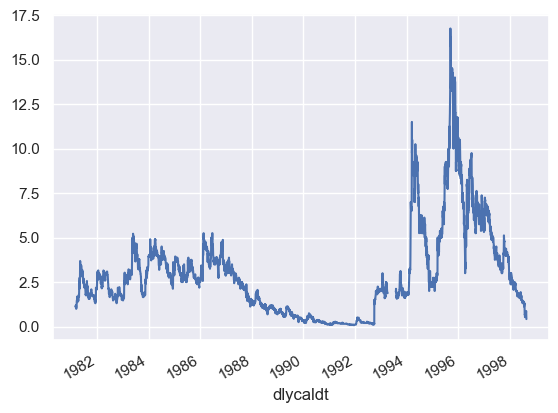

In [30]:
prices['dlyprc'].plot();

Let's zoom into the missing part:

In [31]:
prices2 = prices.loc['1993-03-30':'1993-08-04']

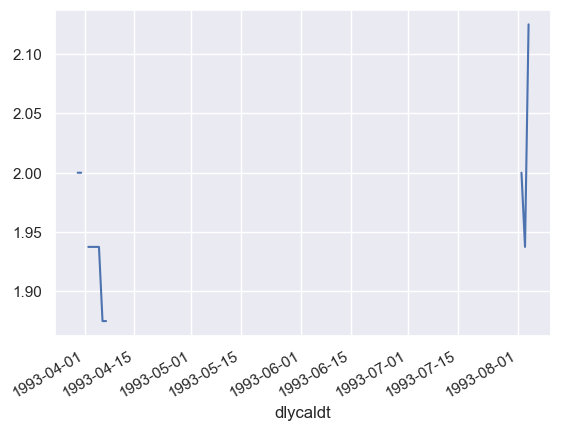

In [32]:
prices2['dlyprc'].plot();

In [33]:
prices2.head(10)

,permno,dlydelflg,dlyprc,dlyprcflg,dlycap,dlycapflg,dlyret,dlyretx,dlyretmissflg,dlydistretflg,dlyvol
dlycaldt,,,,,,,,,,,
1993-03-30,49286,N,2.0000,TR,1608.00,BP,-0.058824,-0.058824,NA,NO,870.0
1993-03-31,49286,N,2.0000,TR,1608.00,BP,0.000000,0.000000,NA,NO,7965.0
1993-04-01,49286,N,NaN,MP,NaN,MP,NaN,NaN,MP,NO,NaN
1993-04-02,49286,N,1.9375,BA,1557.75,BP,-0.031250,-0.031250,NA,NO,0.0
1993-04-05,49286,N,1.9375,BA,1557.75,BP,0.000000,0.000000,NA,NO,0.0
1993-04-06,49286,N,1.8750,TR,1507.50,BP,-0.032258,-0.032258,NA,NO,100.0
1993-04-07,49286,N,1.8750,TR,1507.50,BP,0.000000,0.000000,NA,NO,6100.0
1993-04-08,49286,N,NaN,NT,NaN,NT,NaN,NaN,NT,NO,NaN
1993-04-12,49286,N,NaN,NT,NaN,NT,NaN,NaN,NT,NO,NaN


In [34]:
prices2.tail()

,permno,dlydelflg,dlyprc,dlyprcflg,dlycap,dlycapflg,dlyret,dlyretx,dlyretmissflg,dlydistretflg,dlyvol
dlycaldt,,,,,,,,,,,
1993-07-29,49286,N,NaN,NT,NaN,NT,NaN,NaN,NT,NO,NaN
1993-07-30,49286,N,NaN,NT,NaN,NT,NaN,NaN,NT,NO,NaN
1993-08-02,49286,N,2.0000,TR,3006.00,BP,NaN,NaN,RA,NO,8000.0
1993-08-03,49286,N,1.9375,TR,2912.06,BP,-0.031250,-0.031250,NA,NO,2000.0
1993-08-04,49286,N,2.1250,TR,3193.88,BP,0.096774,0.096774,NA,NO,200.0


Let's see whether we can find a reason for the 'temporary delisting' in the `StkSecurityInfoHist` table:

In [35]:
query = f"""
           SELECT * FROM crsp.StkSecurityInfoHist 
           WHERE permno = {permno} AND secinfostartdt > '1993-01-01'
           """
db.raw_sql(query).iloc[:3]

,permno,secinfostartdt,secinfoenddt,securitybegdt,securityenddt,securityhdrflg,hdrcusip,hdrcusip9,cusip,cusip9,primaryexch,conditionaltype,exchangetier,tradingstatusflg,securitynm,shareclass,usincflg,issuertype,securitytype,securitysubtype,sharetype,securityactiveflg,delactiontype,delstatustype,delreasontype,delpaymenttype,ticker,tradingsymbol,permco,siccd,naics,icbindustry,uesindustry,nasdcompno,nasdissuno,issuernm
0,49286,1993-02-08,1993-04-07,1981-03-02,1998-08-21,N,34068910,340689108,52887080,528870801,Q,RW,SC,A,LEXICON CORP; COM NONE; CONS,None,Y,CORP,EQTY,COM,NS,Y,GDR,VCL,PUBI,PRCF,LEXI,LEXIC,2641,3670,0,NOAVAIL,NOAVAIL,70005180,70005548,LEXICON CORP
1,49286,1993-04-08,1993-08-01,1981-03-02,1998-08-21,N,34068910,340689108,52887080,528870801,X,NT,N/A,X,LEXICON CORP; COM NONE; CONS,None,Y,CORP,EQTY,COM,NS,N,GDR,VCL,PUBI,PRCF,None,None,2641,3670,0,NOAVAIL,NOAVAIL,70005180,70005548,LEXICON CORP
2,49286,1993-08-02,1994-03-20,1981-03-02,1998-08-21,N,34068910,340689108,52887080,528870801,Q,RW,SC,A,LEXICON CORP; COM NONE; CONS,None,Y,CORP,EQTY,COM,NS,Y,GDR,VCL,PUBI,PRCF,LEXI,LEXI,2641,3670,0,NOAVAIL,NOAVAIL,70005180,70005548,LEXICON CORP


Looking at `primaryexch`, switching from `Q` to `X`, and back again to `Q`, we see that the security got delisted temporarily from NASDAQ. 

Conclusion: We might have to take care of periods with a long series of missing returns. 

#### Abnormal delisting returns

Lets now look at abnormally large delisting returns:

In [36]:
delists[delists['delret'] > 3]

,permno,delistingdt,deldtprc,deldtprcflg,delactiontype,delstatustype,delreasontype,delpaymenttype,delpermno,delpermco,delret,delretmisstype,delnextdt,delnextprc,delnextprcflg,delamtdt,deldivamt,deldistype,deldlydt
326,10349,1983-09-20,13.7500,BA,GDR,VCL,SHLD,PRCF,0,0,18.636364,NA,None,NaN,DA,2023-10-26,270.00,D1,1983-09-21
1858,11965,1932-12-28,0.1250,TR,GDR,VCL,UNAV,PRCF,0,0,5.500000,NA,1932-12-31,0.8125,DP,1932-12-31,0.00,NO,1932-12-29
2216,12415,1933-06-28,0.5000,TR,GDR,VCL,UNAV,PRCF,0,0,4.000000,NA,1933-06-30,2.5000,DP,1933-06-30,0.00,NO,1933-06-29
5881,20121,2023-09-14,10.8200,TR,MER,FPAY,UNAV,STK,24259,59657,5.931608,NA,None,NaN,DA,2023-09-15,75.00,D1,2023-09-15
6225,20889,1987-02-20,0.1563,BA,GDR,VCL,CORQ,PRCF,0,0,4.600000,NA,1987-02-24,0.8750,DP,1987-02-24,0.00,NO,1987-02-23
6232,20907,2022-10-26,9.1300,TR,MER,FPAY,UNAV,STK,23445,59415,3.479737,NA,None,NaN,DA,2022-10-27,40.90,D1,2022-10-27
6386,21275,1990-12-24,0.0313,TR,GDR,VCL,MTMK,PRCF,0,0,12.977635,NA,1990-12-26,0.4375,DP,1990-12-26,0.00,NO,1990-12-26
9311,36944,1990-07-27,0.0313,TR,GDR,VCL,MTMK,PRCF,0,0,10.980830,NA,1990-07-30,0.3750,DP,1990-07-30,0.00,NO,1990-07-30
12493,56531,1991-11-29,0.0313,TR,GDR,VCL,INSC,PRCF,0,0,6.000000,NA,1991-12-04,0.2188,DP,1991-12-04,0.00,NO,1991-12-02
16298,76355,2013-06-28,0.1301,TR,MER,FPAY,UNAV,CASH,0,0,3.688701,NA,None,NaN,DA,2013-07-01,0.61,D1,2013-07-01


When having such stocks in a sample, we probably should look carefully whether these returns matter for the overall performance and if so how they arise.

#### Exercises

1) Look a bit closer at `delists`. What do the different columns mean? 

2) (*) How does a company's market capitalization interact with its `delactiontype`? E.g., do smaller companies have a higher likelihood to be acquired?

## Event type 3: Distributions

Distribution events are important as they indicate any payments that are not directly reflected in the stock price, e.g., stock splits, certain delistings, and especially dividend payments. 

All distribution events are collected in the table `StkDistributions`. We will look at the distributions of IBM. 

In [37]:
ibm_permno = 12490

In [38]:
query = f"SELECT * FROM crsp.StkDistributions WHERE permno = {ibm_permno}"
ibm_dists =  db.raw_sql(query, date_cols='disexdt')

In [39]:
ibm_dists.head()

,permno,disexdt,disseqnbr,disordinaryflg,distype,disfreqtype,dispaymenttype,disdetailtype,distaxtype,disorigcurtype,disdivamt,disfacpr,disfacshr,disdeclaredt,disrecorddt,dispaydt,dispermno,dispermco,disamountsourcetype
0,12490,1926-03-01,1,N,FRS,N/A,SS,STKDIV,N,N/A,NaN,2.0,2.0,None,None,1926-02-16,0,0,N/A
1,12490,1926-03-23,1,Y,CD,Q,USD,CDIV,D,USD,0.75,0.0,0.0,None,1926-03-23,1926-04-10,0,0,N/A
2,12490,1926-06-22,1,Y,CD,Q,USD,CDIV,D,USD,0.75,0.0,0.0,None,1926-06-23,1926-07-10,0,0,N/A
3,12490,1926-09-24,1,Y,CD,Q,USD,CDIV,D,USD,0.75,0.0,0.0,None,1926-09-24,1926-10-10,0,0,N/A
4,12490,1926-12-22,1,Y,CD,Q,USD,CDIV,D,USD,0.75,0.0,0.0,None,1926-12-22,1927-01-10,0,0,N/A


Let's look at the distribution type in `distype`:

In [40]:
ibm_dists['distype'].value_counts()

distype
CD     392
FRS     40
SP       3
SD       1
Name: count, dtype: int64

The most frequent distribution is `CD`, standing for a cash dividend. The next frequent distribution type is `FRS` which stands for 'Forward or Reverse Split' (each stock splits into several stocks, or several stocks get exchanged into a single one -- recall the event from the class C securities of Google in the previous notebook).  

To get a better understanding about the possible values that `distype` can take and about the other columns, see also this [overview](https://www.crsp.org/files/DistributionCode.html).  That overview also shows how the legacy distribution codes (`distcd`; see [here](http://www.crsp.org/products/documentation/distribution-codes)) map into this new data format.

Let's look a bit closer at the quarterly dividend payments and how they are reflected in the `StkDistributions` and  `dsf_v2` tables.

In [41]:
ibm_dists[(ibm_dists['distype']=='CD') & (ibm_dists['disexdt'].dt.year==2022)]

,permno,disexdt,disseqnbr,disordinaryflg,distype,disfreqtype,dispaymenttype,disdetailtype,distaxtype,disorigcurtype,disdivamt,disfacpr,disfacshr,disdeclaredt,disrecorddt,dispaydt,dispermno,dispermco,disamountsourcetype
428,12490,2022-02-10,1,Y,CD,Q,USD,CDIV,D,USD,1.64,0.0,0.0,2022-02-01,2022-02-11,2022-03-10,0,0,N/A
429,12490,2022-05-09,1,Y,CD,Q,USD,CDIV,D,USD,1.65,0.0,0.0,2022-04-26,2022-05-10,2022-06-10,0,0,N/A
430,12490,2022-08-09,1,Y,CD,Q,USD,CDIV,D,USD,1.65,0.0,0.0,2022-07-25,2022-08-10,2022-09-10,0,0,N/A
431,12490,2022-11-09,1,Y,CD,Q,USD,CDIV,D,USD,1.65,0.0,0.0,2022-10-25,2022-11-10,2022-12-10,0,0,N/A


In [42]:
query = f"SELECT * FROM crsp.dsf_v2 WHERE permno = {ibm_permno}"
prices = db.raw_sql(query, date_cols='dlycaldt')

In [43]:
prices[prices['dlycaldt'].between('2022-02-09', '2022-02-10') ]

,permno,hdrcusip,permco,siccd,nasdissuno,yyyymmdd,dlycaldt,dlydelflg,dlyprc,dlyprcflg,dlycap,dlycapflg,dlyprevprc,dlyprevprcflg,dlyprevdt,dlyprevcap,dlyprevcapflg,dlyret,dlyretx,dlyreti,dlyretmissflg,dlyretdurflg,dlyorddivamt,dlynonorddivamt,dlyfacprc,dlydistretflg,dlyvol,dlyclose,dlylow,dlyhigh,dlybid,dlyask,dlyopen,dlynumtrd,dlymmcnt,dlyprcvol,disfacpr,disfacshr,disexdt,shrout
25324,12490,45920010,20990,3571,0,20220209,2022-02-09,N,137.79,TR,123570072.0,BP,137.02,TR,2022-02-08,122879536.0,PB,0.005620,0.005620,0.000000,NA,D1,0.00,0.0,1.0,NO,5393478.0,137.79,136.83,138.35,137.82,137.83,137.84,None,None,743167333.6,0.0,0.0,2022-02-10,896800
25325,12490,45920010,20990,3571,0,20220210,2022-02-10,N,133.52,TR,119740736.0,BP,137.79,TR,2022-02-09,123570072.0,PB,-0.019087,-0.030989,0.011902,NA,D1,1.64,0.0,1.0,C1,5978640.0,133.52,133.17,136.56,133.53,133.54,135.47,None,None,798268012.8,NaN,NaN,None,896800


Let's first look at the `dsf_v2` table. Similar as for the other distributions that we have seen, on the previous trading day before the ex-dividend date, the distribution information is giving: `disfacpr` and `disfacshr` are both set to zero (why?), and `disexdt` contains the ex-dividend date. (The original `StkDlySecurityData` table doesn't contain those columns, and we would have to get them from `StkDistributions` as above.) Moreover, `dlyorddivamt` on the ex-dividend date provides the ordinary dividend amount (this is the same number as in `disdivamt` in the distribution events table and would be also available in `StkDlySecurityData`).  Notice that the fields `dlyret` and `dlyretx` are different, the latter one not taking into consideration the dividends paid. Hence, here they are computed as follows:

In [44]:
retx = 133.52 / 137.79 - 1
print('The dlyretx column is computed as {:.6f}.'.format(retx))

The dlyretx column is computed as -0.030989.


In [45]:
ret = (133.52 + 1.64) / 137.79 - 1
print('The dlyret column is computed as {:.6f}.'.format(ret))

The dlyret column is computed as -0.019087.


The `StkDistributions` table contains four dates that are of relevance for dividends:

There are several dates associated to dividends:
 * `disdeclaredt`: Distribution Declaration Date (Announcement date):
 The company announces the next dividend amount it will pay to its shareholders and the record and payment dates.
 
 * `disrecorddt`: Record date:  The cut-off date to determine which shareholders are eligible to receive the dividend.
(An investor must be on the company’s shareholder record on this date to be eligible.)

 * `disexdt`: Ex-dividend date: typically, one business day before the record date. Required because a share buy or sell takes two business days to fully settle. If an investor holds a security on its ex-dividend date (i.e., bought it on the day before or earlier), they will receive the next dividend, otherwise not. In other words, if an investor purchases a stock on its ex-dividend date or after, they will not receive the corresponding dividend payment. 
 
 * `dispaydt`: Payment date: date when the dividends are deposited into investor accounts.

Note that the payment is often much later than the ex-dividend date. Potentially this might matter for backtesting trading strategies. 
When backtesting trading strategies, one often (implicitly) assumes reinvestment of the dividends at the time of the ex-dividend date, as one tends to use `dlyret`. However, this procedure introduces some bias, as in real time one can only reinvest the dividends after the payment date when they realize.  I am not aware of academic papers that discuss this issue, but there might very well be some.

#### Exercises

 3) (*) Study the role of dividends. Here some possible research questions to which I don't know the answer:
     * Does a stock perform better or worse around the time of dividend payments; compared to other periods?
     * What is the effect of the reinvestment timing? Does it matter that in real time the dividend component of the return is only realized at the pay date?

## Event type 4: Share events

The fourth class of events are share events, described in the table `StkShares`. They describe changes in the number of outstanding shares. 

In the last notebook we plotted outstanding shares. Let's do this briefly again, for the Class C securities of Google:

In [46]:
googleC_permno = 14542

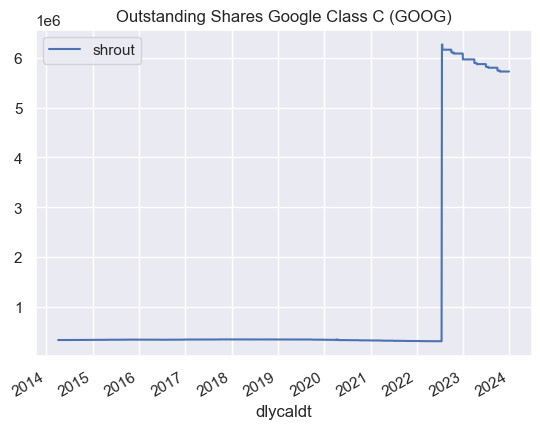

In [47]:
query = f"SELECT dlycaldt, shrout FROM crsp.dsf_v2 WHERE permno = {googleC_permno}"
shares_ts = db.raw_sql(query, date_cols='dlycaldt')
shares_ts = shares_ts.set_index('dlycaldt')
shares_ts.plot(title='Outstanding Shares Google Class C (GOOG)');

Let's now look at the corresponding event table `StkShares`:

In [48]:
query = f"SELECT * FROM crsp.StkShares WHERE permno = {googleC_permno}"
shares = db.raw_sql(query, date_cols=['shrstartdt', 'shrenddt'])

In [49]:
shares.head()

,permno,shrstartdt,shrenddt,shrout,shrsource,shrfactype,shradrflg
0,14542,2014-04-03,2014-04-15,337231,NC,NA,N
1,14542,2014-04-16,2014-06-29,337247,OBS,NA,N
2,14542,2014-06-30,2014-07-16,335832,OBS,NA,N
3,14542,2014-07-17,2014-09-29,338210,OBS,NA,N
4,14542,2014-09-30,2014-10-15,339282,OBS,NA,N


In [50]:
shares['shrsource'].value_counts()

shrsource
OBS    80
NC      6
EVS     2
Name: count, dtype: int64

The corresponding flag descriptions are [here](https://www.crsp.org/files/appendix/FlagType_SD.html).  

The most important value is `OBS` -- these rows arise from company reports (e.g., annual or quarterly reports), where the share structure is disclosed.

Question: what events correspond to the following rows:

In [51]:
shares[shares['shrsource']=='EVS']

,permno,shrstartdt,shrenddt,shrout,shrsource,shrfactype,shradrflg
11,14542,2015-04-27,2015-06-07,342630,EVS,S1,N
74,14542,2022-07-18,2022-07-21,6267520,EVS,S1,N


Hint: Recall the earlier notebook with the case study for Google.

In [52]:
db.close()

In [53]:
%reset -f